# Proyek Klasifikasi Gambar dengan KNN
Proyek ini bertujuan untuk melakukan klasifikasi gambar menggunakan model K-Nearest Neighbors (KNN). Berikut adalah langkah-langkah yang dilakukan dalam proyek ini:
1. **Import Library**
2. **Praproses Data**
3. **Pelatihan Model**
4. **Evaluasi dan Visualisasi Hasil**
5. **Kesimpulan**

Setiap langkah akan dijelaskan lebih rinci pada bagian berikutnya.

# LOAD DATASET

In [1]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d fthnaja/kain-ulos
!unzip kain-ulos.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/fthnaja/kain-ulos
License(s): MIT
100% 2.46G/2.47G [00:30<00:00, 151MB/s]
100% 2.47G/2.47G [00:30<00:00, 87.7MB/s]
Archive:  kain-ulos.zip
  inflating: Test/Pinuncaan/IMG_20240611_201106.jpg  
  inflating: Test/Pinuncaan/IMG_20240611_201107.jpg  
  inflating: Test/Pinuncaan/IMG_20240611_201107_1.jpg  
  inflating: Test/Pinuncaan/IMG_20240611_201107_11.jpg  
  inflating: Test/Pinuncaan/IMG_20240611_201108.jpg  
  inflating: Test/Pinuncaan/IMG_20240611_201108_1.jpg  
  inflating: Test/Pinuncaan/IMG_20240611_201108_11.jpg  
  inflating: Test/Pinuncaan/IMG_20240611_201108_2.jpg  
  inflating: Test/Pinuncaan/IMG_20240611_201108_22.jpg  
  inflating: Test/Pinuncaan/IMG_20240611_201109.jpg  
  inflating: Test/Pinuncaan/IMG_20240611_201110.jpg  
  inflating: Test/Pinuncaan/IMG_20240611_201114 4.jpg  
  inflating: Test/

## DATA UNDERSTANDING

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import cv2
import imghdr
from collections import Counter
from PIL import Image
import tensorflow as tf
tf.random.set_seed(1234)

warnings.filterwarnings('ignore')

In [3]:
train_path = "Train"
test_path = "Test"

img_classes = os.listdir(train_path)
print(f"Classes inside the dataset: {img_classes}")

Classes inside the dataset: ['Pinuncaan', 'Tumtuman', 'Ragi Hotang', 'Ragi Hidup', 'Sadum', 'Sibolang']


## Memeriksa Distribusi Kelas di Dataset

In [4]:
# Fungsi untuk mendapatkan distribusi jumlah gambar per kelas
def get_class_distribution(path):
    class_counts = {cls: len(os.listdir(os.path.join(path, cls))) for cls in img_classes}
    total_images = sum(class_counts.values())
    return class_counts, total_images

In [5]:
# Menampilkan distribusi dataset
train_distribution, total_train_images = get_class_distribution(train_path)
test_distribution, total_test_images = get_class_distribution(test_path)

print("Train Dataset Distribution:")
for cls, count in train_distribution.items():
    print(f"  - {cls}: {count} images")
print(f"Total images in Train dataset: {total_train_images}\n")

print("Test Dataset Distribution:")
for cls, count in test_distribution.items():
    print(f"  - {cls}: {count} images")
print(f"Total images in Test dataset: {total_test_images}\n")

Train Dataset Distribution:
  - Pinuncaan: 134 images
  - Tumtuman: 136 images
  - Ragi Hotang: 138 images
  - Ragi Hidup: 136 images
  - Sadum: 136 images
  - Sibolang: 135 images
Total images in Train dataset: 815

Test Dataset Distribution:
  - Pinuncaan: 67 images
  - Tumtuman: 70 images
  - Ragi Hotang: 71 images
  - Ragi Hidup: 69 images
  - Sadum: 68 images
  - Sibolang: 71 images
Total images in Test dataset: 416



In [6]:
class_labels = {
    0: 'Tumtuman',
    1: 'Sadum',
    2: 'Sibolang',
    3: 'Ragi Hidup',
    4: 'Ragi Hotang',
    5: 'Pinuncaan'
}

# To get the class name for a label:
label = 3
class_name = class_labels[label]

# To get the label from a class name:
class_name = 'Pinuncaan'
label = list(class_labels.keys())[list(class_labels.values()).index(class_name)]

## Menganalisis Dimensi Gambar

In [7]:
# Mengimpor library yang diperlukan
from PIL import Image
import os
import pandas as pd

# Path dataset (ganti dengan path sesuai struktur folder dataset Anda)
dataset_path = "Train"

# Mendapatkan daftar kategori (subfolder) dalam dataset
categories = os.listdir(dataset_path)

# Inisialisasi list untuk menyimpan informasi dimensi gambar
image_data = []

# Mengumpulkan informasi dimensi setiap gambar dalam dataset
for category in categories:
    category_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_data.append({
                    "Category": category,
                    "Image Name": img_name,
                    "Width": width,
                    "Height": height
                })
        except Exception as e:
            print(f"Error membaca file: {img_path}, {e}")

# Membuat tabel menggunakan pandas
dimensi = pd.DataFrame(image_data)

# Menampilkan tabel
dimensi


,Category,Image Name,Width,Height
0,Pinuncaan,IMG_20240611_2011233.jpg,3000,4000
1,Pinuncaan,IMG_5313.PNG,828,684
2,Pinuncaan,IMG_5364.PNG,828,1792
3,Pinuncaan,IMG_E4595.JPG,649,715
4,Pinuncaan,IMG_20240611_201114.jpg,3000,4000
...,...,...,...,...
810,Sibolang,IMG-20240705-WA0113.jpg,591,1280
811,Sibolang,WhatsApp Image 2024-07-05 at 23.49.23 (17) - C...,591,561
812,Sibolang,sibolang3.jpeg,432,431
813,Sibolang,WhatsApp Image 2024-07-05 at 23.49.23 (23).jpeg,591,1280


## Menganalisis Format Gambar

In [8]:
# Mengimpor library yang diperlukan
from PIL import Image
import os
import pandas as pd

# Path dataset (ganti dengan path sesuai struktur folder dataset Anda)
dataset_path = "Train"

# Mendapatkan daftar kategori (subfolder) dalam dataset
categories = os.listdir(dataset_path)

# Inisialisasi list untuk menyimpan informasi format gambar
formats = []

# Mengumpulkan informasi format setiap gambar dalam dataset
for category in categories:
    category_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        try:
            with Image.open(img_path) as img:
                formats.append(img.format)
        except Exception as e:
            print(f"Error membaca file: {img_path}, {e}")

# Menghitung distribusi format gambar
format_counts = {fmt: formats.count(fmt) for fmt in set(formats)}

# Membuat tabel menggunakan pandas
format_image = pd.DataFrame(list(format_counts.items()), columns=["Format", "Count"])

# Menampilkan tabel
format_image


,Format,Count
0,PNG,193
1,JPEG,622


## Menganalisis Ukuran File

In [9]:
# Mengimpor library yang diperlukan
import os
import pandas as pd

# Path dataset (ganti dengan path sesuai struktur folder dataset Anda)
dataset_path = "Train"

# Mendapatkan daftar kategori (subfolder) dalam dataset
categories = os.listdir(dataset_path)

# Inisialisasi list untuk menyimpan informasi ukuran file
file_data = []

# Mengumpulkan informasi ukuran file untuk setiap gambar
for category in categories:
    category_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        try:
            file_size = os.path.getsize(img_path)  # Ukuran file dalam bytes
            file_data.append({"Category": category, "File Name": img_name, "File Size (Bytes)": file_size})
        except Exception as e:
            print(f"Error membaca ukuran file: {img_path}, {e}")

# Membuat DataFrame dari data file
file_df = pd.DataFrame(file_data)

# Menambahkan kolom ukuran file dalam KB
file_df["File Size (KB)"] = file_df["File Size (Bytes)"] / 1024

# Menghitung statistik ukuran file per kategori
category_stats = file_df.groupby("Category")["File Size (KB)"].agg(["mean", "min", "max"]).reset_index()
category_stats.rename(columns={"mean": "Average Size (KB)", "min": "Min Size (KB)", "max": "Max Size (KB)"}, inplace=True)

# Menampilkan tabel statistik ukuran file
category_stats


,Category,Average Size (KB),Min Size (KB),Max Size (KB)
0,Pinuncaan,2487.320823,98.361328,5452.903320
1,Ragi Hidup,1846.734906,553.850586,5391.858398
2,Ragi Hotang,4737.859962,1554.805664,7083.863281
3,Sadum,3017.743810,1753.278320,6530.114258
4,Sibolang,49.298192,7.940430,91.976562
5,Tumtuman,1544.419829,17.259766,6858.087891


## Visualisasi Distribusi Gambar per Kategori

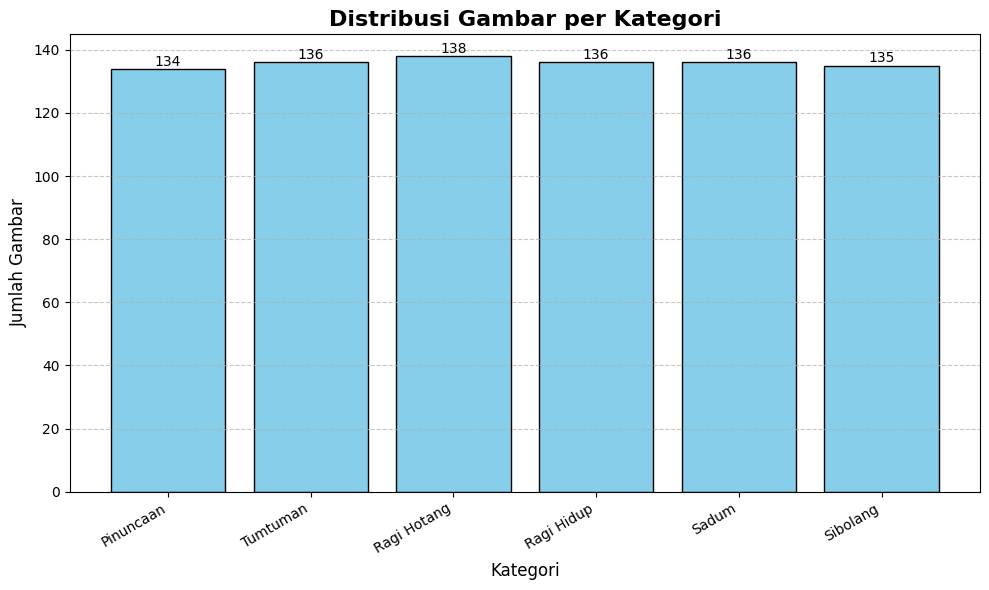

In [10]:
# Mengimpor library yang diperlukan
import matplotlib.pyplot as plt
import os

# Path dataset (ganti dengan path sesuai struktur folder dataset Anda)
dataset_path = "Train"

# Mendapatkan daftar kategori (subfolder) dalam dataset
categories = os.listdir(dataset_path)

# Hitung jumlah gambar per kategori
class_counts = {cat: len(os.listdir(os.path.join(dataset_path, cat))) for cat in categories}

# Membuat plot distribusi
plt.figure(figsize=(10, 6))
bars = plt.bar(class_counts.keys(), class_counts.values(), color='skyblue', edgecolor='black')

# Menambahkan anotasi jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, str(yval), ha='center', fontsize=10)

# Mengatur judul dan label
plt.title("Distribusi Gambar per Kategori", fontsize=16, fontweight='bold')
plt.xlabel("Kategori", fontsize=12)
plt.ylabel("Jumlah Gambar", fontsize=12)
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()


In [11]:
# Mengimpor library yang diperlukan
import numpy as np

# Total jumlah gambar
total_images = sum(class_counts.values())

# Hitung rata-rata jumlah gambar per kategori
mean_images = total_images / len(class_counts)

# Standar deviasi distribusi gambar
std_dev = np.std(list(class_counts.values()))

# Menampilkan hasil analisis
print(f"Total gambar: {total_images}")
print(f"Rata-rata jumlah gambar per kategori: {mean_images:.2f}")
print(f"Standar deviasi distribusi: {std_dev:.2f}")

# Analisis keseimbangan dataset
threshold = 0.1 * mean_images
if std_dev > threshold:
    print("Dataset kemungkinan TIDAK seimbang.")
    print(f"Threshold keseimbangan (10% dari rata-rata): {threshold:.2f}")
else:
    print("Dataset kemungkinan CUKUP seimbang.")
    print(f"Threshold keseimbangan (10% dari rata-rata): {threshold:.2f}")


Total gambar: 815
Rata-rata jumlah gambar per kategori: 135.83
Standar deviasi distribusi: 1.21
Dataset kemungkinan CUKUP seimbang.
Threshold keseimbangan (10% dari rata-rata): 13.58


In [12]:
# Mengimpor library yang diperlukan
from PIL import Image
import numpy as np
import os

# Path dataset (ganti dengan path sesuai struktur folder dataset Anda)
dataset_path = "Train"

# Mendapatkan daftar kategori (subfolder) dalam dataset
categories = os.listdir(dataset_path)

# Analisis tipe data piksel
print("Analisis Tipe Data Piksel:")
print("-" * 40)
for category in categories:
    category_path = os.path.join(dataset_path, category)
    analyzed = False
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        try:
            with Image.open(img_path) as img:
                img_array = np.array(img)
                print(f"Kategori: {category}")
                print(f"  - File: {img_name}")
                print(f"  - Dimensi Array: {img_array.shape}")
                print(f"  - Tipe Data Piksel: {img_array.dtype}")
                analyzed = True
                break
        except Exception as e:
            print(f"Error membaca file: {img_path}, {e}")
    if not analyzed:
        print(f"Tidak ada file yang valid di kategori: {category}")
print("-" * 40)


Analisis Tipe Data Piksel:
----------------------------------------
Kategori: Pinuncaan
  - File: IMG_20240611_2011233.jpg
  - Dimensi Array: (4000, 3000, 3)
  - Tipe Data Piksel: uint8
Kategori: Tumtuman
  - File: WhatsApp Image 2024-07-05 at 23.54.27 (3).jpeg
  - Dimensi Array: (803, 465, 3)
  - Tipe Data Piksel: uint8
Kategori: Ragi Hotang
  - File: IMG_20240705_231339_1.jpg
  - Dimensi Array: (4000, 3000, 3)
  - Tipe Data Piksel: uint8
Kategori: Ragi Hidup
  - File: IMG_5179.PNG
  - Dimensi Array: (972, 706, 4)
  - Tipe Data Piksel: uint8
Kategori: Sadum
  - File: IMG_20240611_193401.jpg
  - Dimensi Array: (4000, 3000, 3)
  - Tipe Data Piksel: uint8
Kategori: Sibolang
  - File: WhatsApp Image 2024-07-05 at 23.49.23 (27).jpeg
  - Dimensi Array: (1280, 591, 3)
  - Tipe Data Piksel: uint8
----------------------------------------


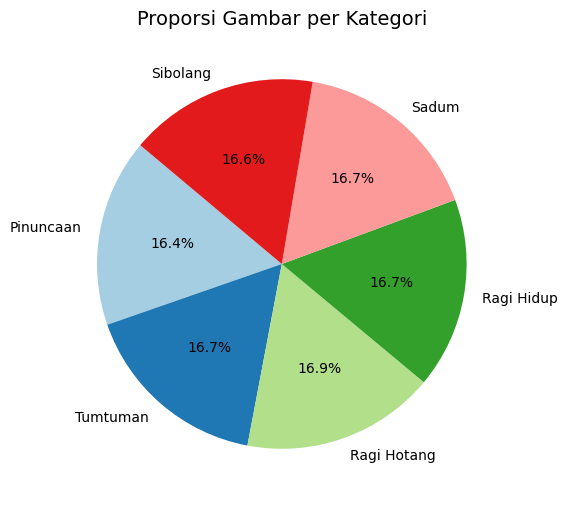

In [13]:
# Mengimpor library yang diperlukan
import matplotlib.pyplot as plt

# Pie chart untuk proporsi gambar per kategori
plt.figure(figsize=(8, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Menambahkan judul dan menyesuaikan labelnfiruhf34p9/
plt.title("Proporsi Gambar per Kategori", fontsize=14)

# Menampilkan chart
plt.show()


# Data Preparation

## Memvalidasi Format Gambar

In [14]:
import os
import imghdr

img_ext = ['jpg', 'jpeg', 'bmp', 'png']

for image_class in os.listdir(train_path):
    class_path = os.path.join(train_path, image_class)
    for image in os.listdir(class_path):
        image_path = os.path.join(class_path, image)
        if not os.path.isfile(image_path):
            continue
        if imghdr.what(image_path) not in img_ext:
            print(f"Invalid format: {image_path}")
            os.remove(image_path)


## Mengubah Ukuran Gambar

In [15]:
import cv2

target_size = (256, 256)

for image_class in os.listdir(train_path):
    class_path = os.path.join(train_path, image_class)
    for image in os.listdir(class_path):
        image_path = os.path.join(class_path, image)
        try:
            img = cv2.imread(image_path)
            resized_img = cv2.resize(img, target_size)
            cv2.imwrite(image_path, resized_img)
        except Exception as e:
            print(f"Error processing image {image_path}: {e}")


## Preprocessing Gambar

In [20]:
import numpy as np

def normalize_image(image):
    return image / 255.0


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import cv2

def preprocess_images(image_path, target_size=(64, 64)):
    data, labels = [], []
    for category in os.listdir(image_path):
        category_path = os.path.join(image_path, category)
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            try:
                img = cv2.imread(img_path)
                img = cv2.resize(img, target_size)
                data.append(img)
                labels.append(category)
            except Exception as e:
                print(f"Error memproses file: {img_path}, {e}")
    return np.array(data), np.array(labels)

# Implementasi Model KNN

### Optimasi Hyperparameter KNN

In [26]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Assuming 'train_path' contains the path to your training data
X, y = preprocess_images(train_path)

# Flatten the image data
X_train_flat = X.reshape(X.shape[0], -1)

# Encode the labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y)

# Split the data into training and testing sets
X_train_flat, X_test_flat, y_train, y_test = train_test_split(
    X_train_flat, y_train, test_size=0.2, random_state=42
)

# Parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Grid Search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_flat, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [27]:
from sklearn.model_selection import GridSearchCV

# Parameter grid untuk KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Grid Search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_flat, y_train)

# Model terbaik
best_knn = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluasi model terbaik
y_pred = best_knn.predict(X_test_flat)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Classification Report:
              precision    recall  f1-score   support

   Pinuncaan       1.00      0.97      0.98        29
  Ragi Hidup       0.97      1.00      0.98        30
 Ragi Hotang       0.97      1.00      0.98        28
       Sadum       1.00      1.00      1.00        27
    Sibolang       0.83      0.96      0.89        25
    Tumtuman       1.00      0.79      0.88        24

    accuracy                           0.96       163
   macro avg       0.96      0.95      0.95       163
weighted avg       0.96      0.96      0.96       163



### Normalisasi Fitur

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_flat = scaler.fit_transform(X_train_flat)
X_test_flat = scaler.transform(X_test_flat)


### Oversampling Data dengan SMOTE

In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_flat, y_train = smote.fit_resample(X_train_flat, y_train)


In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
X_train_flat = pca.fit_transform(X_train_flat)
X_test_flat = pca.transform(X_test_flat)


### Validasi dengan Cross-Validation

In [31]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_knn, X_train_flat, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_scores.mean())


Cross-Validation Accuracy: 0.9732227750138197


# Visualisasi Evaluasi

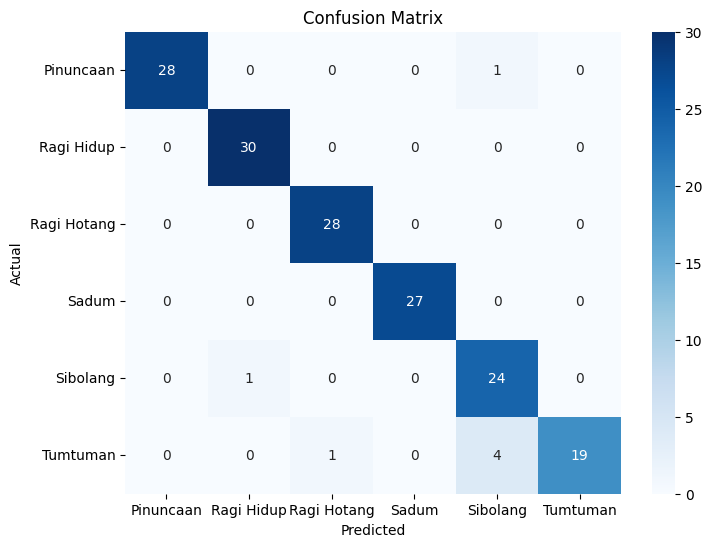

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Visualisasi Hasil Prediksi



Menampilkan contoh gambar dari setiap kategori:
--------------------------------------------------


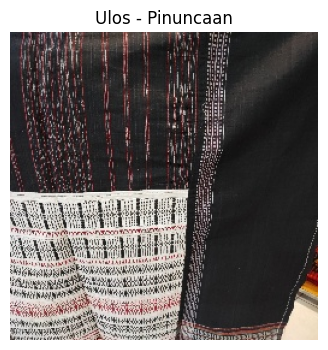

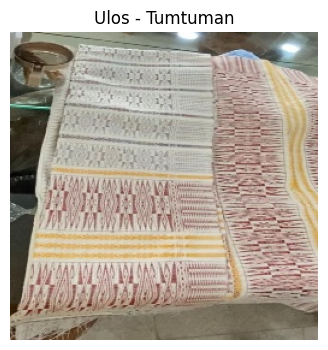

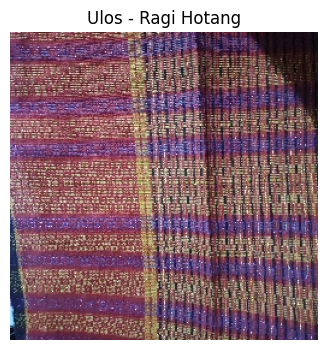

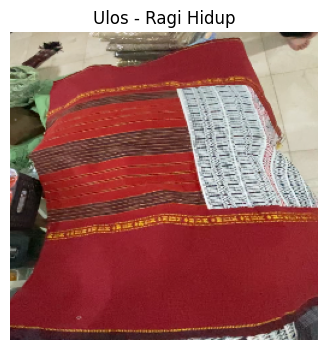

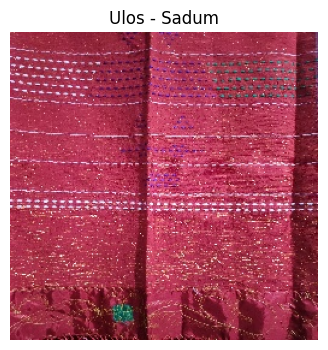

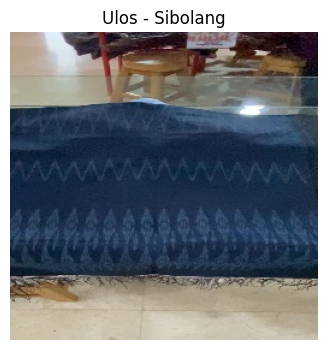

--------------------------------------------------


In [34]:
# Mengimpor library yang diperlukan
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

# Path dataset
dataset_path = "Train"

# Mendapatkan daftar kategori (subfolder) dalam dataset
categories = os.listdir(dataset_path)

# Visualisasi contoh gambar dari setiap kategori
print("Menampilkan contoh gambar dari setiap kategori:")
print("-" * 50)
for category in categories:
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        try:
            sample_image_name = os.listdir(category_path)[0]
            sample_image_path = os.path.join(category_path, sample_image_name)
            with Image.open(sample_image_path) as img:
                plt.figure(figsize=(4, 4))
                plt.imshow(np.array(img))
                plt.title(f"Ulos - {category}", fontsize=12)
                plt.axis('off')
                plt.show()
        except IndexError:
            print(f"Tidak ada gambar dalam kategori: {category}")
        except Exception as e:
            print(f"Error membuka gambar di kategori {category}: {e}")
print("-" * 50)


## Splitting Data

In [36]:
from sklearn.model_selection import train_test_split

test_size = 0.2
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)


# Build Model

In [39]:
# Importing the required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# num_features will be height * width * channels
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)

# Initialize the KNN model with the chosen number of neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on the reshaped training data
knn.fit(X_train_reshaped, y_train)

# If you want to tune hyperparameters, such as the number of neighbors, you can use GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

# Fit the GridSearchCV with the reshaped data
grid_search.fit(X_train_reshaped, y_train)

# Display the best parameter found
best_knn = grid_search.best_estimator_

##Pelatihan Model

In [41]:
# Latih model
knn_model = KNeighborsClassifier(n_neighbors=5)
# Reshape X_train to 2D before fitting:
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
knn_model.fit(X_train_reshaped, y_train)

KNeighborsClassifier()

#Prediksi Gambar

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict_and_display_image(model, image_path, image_size=(64, 64)):

    class_labels = {
        0: 'Tumtuman',
        1: 'Sadum',
        2: 'Sibolang',
        3: 'Ragi Hidup',
        4: 'Ragi Hotang',
        5: 'Pinuncaan'
    }

    # Prediksi menggunakan model
    prediction = model.predict(input_image)[0]

    # Get class name using the predicted label (integer)
    predicted_class_name = class_labels.get(prediction)

    # Handle the case where prediction is not found in class_labels
    if predicted_class_name is None:
        print(f"Warning: Predicted class label {prediction} not found in class_labels.")
        predicted_class_name = "Unknown"


In [44]:
train_path = "Train"
test_path = "Test"
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

In [45]:
def extract_features_from_image(img_path):

    img = Image.open(img_path).convert('RGB')
    img = img.resize(IMG_SIZE)
    img_array = np.array(img)

    fd, hog_image = hog(img_array, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2),
                        visualize=True, channel_axis=-1)


    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    return fd

In [46]:
from skimage.feature import hog
from skimage import exposure

import os
from PIL import Image
import numpy as np

def extract_features_from_image(img_path):

    img = Image.open(img_path).convert('RGB')
    img = img.resize(IMG_SIZE)
    img_array = np.array(img)

    # Calculate HOG features and the HOG image for visualization
    fd, hog_image = hog(img_array, orientations=9, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), visualize=True,
                        channel_axis=-1)

    # Rescale HOG image intensity for better visualization
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    return fd

In [48]:
from skimage.feature import hog
from skimage import exposure
from sklearn.preprocessing import LabelEncoder
import os
from PIL import Image
import numpy as np

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

def load_and_process_data(data_path):

    X = []
    y = []
    class_names = []

    for class_name in os.listdir(data_path):
        class_path = os.path.join(data_path, class_name)
        class_names.append(class_name)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                features = extract_features_from_image(img_path)
                X.append(features)
                y.append(class_name)
            except Exception as e:
                print(f"Error processing image {img_path}: {e}")

    return np.array(X), np.array(y), class_names

def extract_features_from_image(img_path):

    img = Image.open(img_path).convert('RGB')
    img = img.resize(IMG_SIZE)
    img_array = np.array(img)

    # Calculate HOG features and the HOG image for visualization
    fd, hog_image = hog(img_array, orientations=9, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), visualize=True,
                        channel_axis=-1)

    # Rescale HOG image intensity for better visualization
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    return fd

In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [53]:
# Reshape X_test to 2D before prediction:
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)
y_pred = best_knn.predict(X_test_reshaped)

In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def predict_image(model, img_path, image_size=(64, 64)):

    # Load and preprocess the image
    img = cv2.imread(img_path)
    img = cv2.resize(img, image_size)
    img = img.astype('float32') / 255.0
    img = img.reshape(1, -1)

    # Prediksi menggunakan model
    predicted_label = model.predict(img)[0]

    # Access the class labels using the predicted label as an index
    predicted_class = class_labels[predicted_label]

    return predicted_class

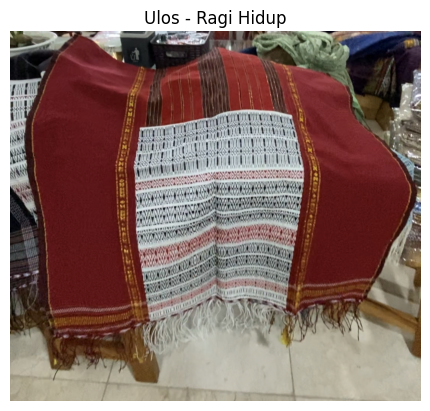

In [89]:
test_image_path = "/content/Test/Ragi Hidup/IMG_4630.PNG"
predicted_class_label = predict_image(knn_model, test_image_path)

img = cv2.imread(test_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(f"Ulos - {predicted_class_label}")
plt.axis('off')
plt.show()


##Menyimpan dan Memuat Model

In [90]:
import pickle

# Replace 'model' with the actual variable name of your trained model (knn_model or best_knn)
with open('ulos_knn_model.pkl', 'wb') as file:
    pickle.dump(knn, file)

In [91]:
from google.colab import files

# Path to the file you want to download
file_path = '/content/ulos_knn_model.pkl'

# Download the file
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>